# Census Income Data Set



### Data Set Information:

#### Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

#### Prediction task is to determine whether a person makes over 50K a year.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#import dataset
df=pd.read_csv('CensusData.csv')

In [3]:
#shape
df.shape

(32561, 15)

dataset contain 32561 rows and 15 columns

In [4]:
#check first 5 rows
df.head()

,Age,workclass,fnlwgt,education,education-num,Marital-status,Occupation,Relationship,Race,Sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
Marital-status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#check null values
df.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

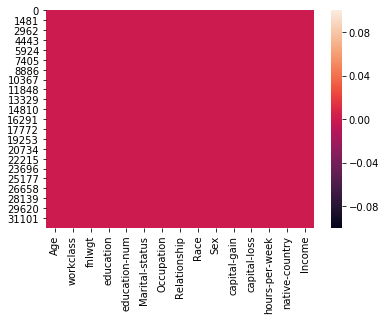

In [7]:
sns.heatmap(df.isnull())

In [8]:
#check datatypes
df.dtypes

Age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [9]:
df.head()

,Age,workclass,fnlwgt,education,education-num,Marital-status,Occupation,Relationship,Race,Sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
#describe
df.describe()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


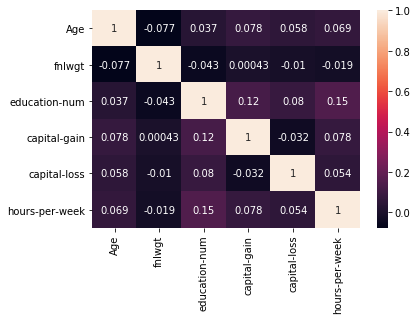

In [11]:
#check corr
sns.heatmap(df.corr(),annot=True)

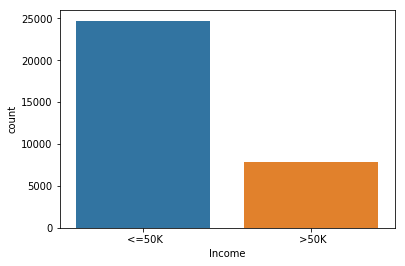

In [12]:
sns.countplot(x='Income',data=df)

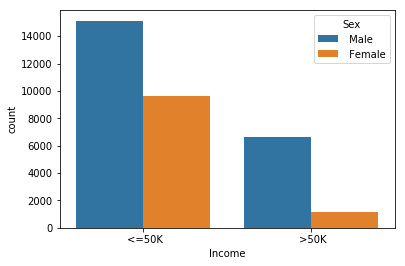

In [13]:
sns.countplot(x='Income',hue='Sex',data=df)

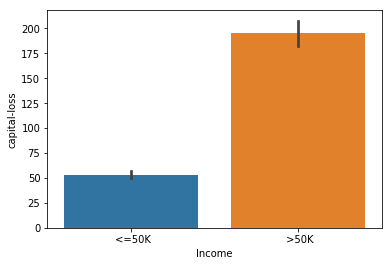

In [14]:
sns.barplot(x='Income',y='capital-loss',data=df)

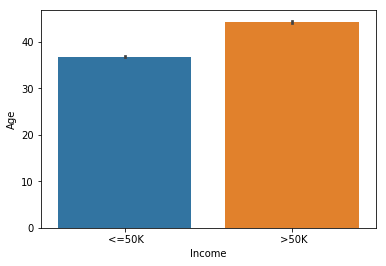

In [15]:
sns.barplot(x='Income',y='Age',data=df)

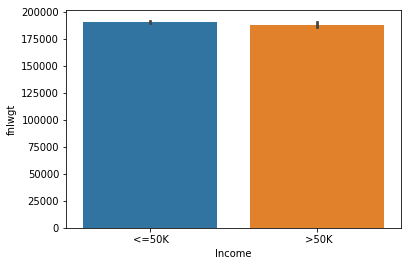

In [16]:
sns.barplot(x='Income',y='fnlwgt',data=df)

In [17]:
from sklearn.preprocessing import LabelEncoder
obj=['workclass','education','Marital-status','Occupation','Relationship','Race','Sex','native=country','Income']

la=LabelEncoder()
df['workclass']=la.fit_transform(df['workclass'])
df['education']=la.fit_transform(df['education'])
df['Marital-status']=la.fit_transform(df['Marital-status'])
df['Occupation']=la.fit_transform(df['Occupation'])
df['Relationship']=la.fit_transform(df['Relationship'])
df['Race']=la.fit_transform(df['Race'])
df['Sex']=la.fit_transform(df['Sex'])

df['native-country']=la.fit_transform(df['native-country'])

    
    


In [18]:
df1=df.drop('Income',axis=1)

In [19]:
#check skewness
df1.skew()

Age                0.558743
workclass         -0.752024
fnlwgt             1.446980
education         -0.934042
education-num     -0.311676
Marital-status    -0.013508
Occupation         0.114583
Relationship       0.786818
Race              -2.435386
Sex               -0.719293
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
native-country    -3.658303
dtype: float64

In [20]:
#Treating the skewness using log
import numpy as np
for col in df1.columns:
#Here complete column name has been passed
    if df1.skew().loc[col]>0.55:
        df[col]=np.log1p(df1[col])

In [21]:
#split the data
x=df1
y=df['Income']

In [22]:
df['Income'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

In [23]:
# we can see its imbalance dataset

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)


In [25]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([0, 0, 0, ..., 0, 0, 1])

In [26]:

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

C:\Users\CG-DTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [27]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        ("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

model=[LogisticRegression(),DecisionTreeClassifier()]
for m in model:
    max_aucroc_score(m,x,y)
    print(m)
    print("Mean auc_roc score for: ",m,cross_val_score(m,x,y,cv=5,scoring="roc_auc").mean())
    print("standard deviation in auc_roc score for : ",m,cross_val_score(m,x,y,cv=5,scoring="roc_auc").std())
    print(cross_val_score(m,x,y,cv=5,scoring="roc_auc"))
    print('*************************************************************************************************')
    


max auc roc score corresponding to  92  is  0.7779126213592233
LogisticRegression()
Mean auc_roc score for:  LogisticRegression() 0.85431222082142
standard deviation in auc_roc score for :  LogisticRegression() 0.0024715261669476262
[0.85092171 0.85335081 0.85842717 0.85366865 0.85519276]
*************************************************************************************************
max auc roc score corresponding to  50  is  0.8685275080906149
DecisionTreeClassifier()
Mean auc_roc score for:  DecisionTreeClassifier() 0.8504247572815533
standard deviation in auc_roc score for :  DecisionTreeClassifier() 0.044735823922092445
[0.77447411 0.82605178 0.88066343 0.88652913 0.88400081]
*************************************************************************************************


In [29]:
#Lets use random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [30]:

#Lets use random forest classifier
#Lets print auc roc score and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
lg = RandomForestClassifier(n_estimators=500)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('roc_auc:\n',roc_auc_score(y_test,y_pred))

print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print('classification_report:\n',classification_report(y_test,y_pred))




roc_auc:
 0.900264123617708
confusion_matrix:
 [[4368  570]
 [ 416 4534]]
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      4938
           1       0.89      0.92      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888



In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[4368  570]
 [ 416 4534]]
f1 score is :  0.9019295802665607
classification report 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      4938
           1       0.89      0.92      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

AUC ROC Score:  0.900264123617708


In [32]:

print(cross_val_score(lg,x,y,cv=5,scoring="roc_auc"))

[0.93386743 0.95166336 0.98280474 0.98496138 0.98290528]


In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


In [34]:
#Lets save this model using joblib
#Lets save the above model
from joblib import dump, load
dump(lg, 'census_income.joblib') 


['census_income.joblib']